<a href="https://colab.research.google.com/github/emnordi/ce888/blob/master/Project2/Project2_mushroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import os
import io
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

os.environ['KAGGLE_USERNAME'] = "emilnordin" # username from the json file

os.environ['KAGGLE_KEY'] = "fd1ae7405c909d36a1ecffea5cd2749a" # key from the json file

In [0]:
!kaggle datasets download -d uciml/mushroom-classification

mushroom-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
data_mush = pd.read_csv('mushroom-classification.zip', compression='zip', header=0, sep=',', quotechar='"', encoding = "utf-8")

In [0]:
#Downsample to get 65% imbalance
mush_p_ind = data_mush[data_mush['class'] == 'p'].index
to_del = mush_p_ind[0:int(len(mush_p_ind)*0.43)]
data_mush_imbalanced = data_mush.drop(index=to_del)

#Convert string data to ints
data_mush_imbalanced_ = pd.get_dummies(data_mush_imbalanced)
data_mush_imbalanced_ = data_mush_imbalanced_.drop('class_e', axis=1)

In [0]:
print(data_mush_imbalanced_)

      class_p  cap-shape_b  cap-shape_c  ...  habitat_p  habitat_u  habitat_w
1           0            0            0  ...          0          0          0
2           0            1            0  ...          0          0          0
4           0            0            0  ...          0          0          0
5           0            0            0  ...          0          0          0
6           0            1            0  ...          0          0          0
...       ...          ...          ...  ...        ...        ...        ...
8119        0            0            0  ...          0          0          0
8120        0            0            0  ...          0          0          0
8121        0            0            0  ...          0          0          0
8122        1            0            0  ...          0          0          0
8123        0            0            0  ...          0          0          0

[6441 rows x 116 columns]


In [0]:
print(data_mush_imbalanced_['class_p'].value_counts())
print("Imbalance:", data_mush_imbalanced_['class_p'].value_counts()[0]/sum(data_mush_imbalanced_.class_p.value_counts()))

0    4208
1    2233
Name: class_p, dtype: int64
Imbalance: 0.6533147026859183


In [0]:
tree_clf = tree.DecisionTreeClassifier(random_state=0)
rf_clf = RandomForestClassifier(max_depth=2, random_state=0)

In [0]:
def evaluatePerformance(clf, features, labels):
  a = cross_val_score(tree_clf, features, labels, cv=10, scoring='accuracy')
  p = cross_val_score(tree_clf, features, labels, cv=10, scoring='precision')
  r = cross_val_score(tree_clf, features, labels, cv=10, scoring='recall')
  f = cross_val_score(tree_clf, features, labels, cv=10, scoring='f1')

  print("Accuracy:", a.mean(), "+/-", a.std())
  print("Precision:", p.mean(), "+/-", p.std())
  print("Recall:", r.mean(), "+/-", r.std())
  print("F1-Score:", f.mean(), "+/-", f.std())

In [0]:
#Mushroom dataset base scores DT
feat_mush = np.array(data_mush_imbalanced_.drop('class_p', axis=1))
lab_mush = np.array(data_mush_imbalanced_['class_p'])

evaluatePerformance(tree_clf, feat_mush, lab_mush)

Accuracy: 0.9996899224806202 +/- 0.0009302325581395434
Precision: 1.0 +/- 0.0
Recall: 0.9991071428571429 +/- 0.0026785714285714195
F1-Score: 0.9995515695067265 +/- 0.0013452914798206318


In [0]:
#Mushroom dataset base scores RF
evaluatePerformance(rf_clf, feat_mush, lab_mush)

Accuracy: 0.9996899224806202 +/- 0.0009302325581395434
Precision: 1.0 +/- 0.0
Recall: 0.9991071428571429 +/- 0.0026785714285714195
F1-Score: 0.9995515695067265 +/- 0.0013452914798206318


DOWNSAMPLING THE DATASETS AND RETRIEVING NEW PERFORMANCE RESULTS

In [0]:
#Downsample MUSHROOM DATASET to get 50%
mush_p_ind_ = data_mush_imbalanced_[data_mush_imbalanced_['class_p'] == 0].index
to_del = mush_p_ind_[0:int(len(mush_p_ind_)*0.46)]
data_mush_imbalanced_test = data_mush_imbalanced_.drop(index=to_del)

print(data_mush_imbalanced_test['class_p'].value_counts())
print("Imbalance:", data_mush_imbalanced_test['class_p'].value_counts()[0]/(data_mush_imbalanced_test['class_p'].value_counts()[1]+(data_mush_imbalanced_test['class_p'].value_counts()[0])))

0    2273
1    2233
Name: class_p, dtype: int64
Imbalance: 0.5044385264092321


In [0]:
#MUSHROOM DATASET downsampling scores DT
feat_mush_test = data_mush_imbalanced_test.drop('class_p', axis=1)
lab_mush_test = data_mush_imbalanced_test['class_p']

evaluatePerformance(tree_clf, feat_mush_test, lab_mush_test)

Accuracy: 0.9995565410199557 +/- 0.0013303769401330269
Precision: 1.0 +/- 0.0
Recall: 0.9991031390134528 +/- 0.002690582959641263
F1-Score: 0.9995495495495496 +/- 0.001351351351351371


In [0]:
#MUSHROOM DATASET downsampling scores RF
evaluatePerformance(rf_clf, feat_mush_test, lab_mush_test)

Accuracy: 0.9995565410199557 +/- 0.0013303769401330269
Precision: 1.0 +/- 0.0
Recall: 0.9991031390134528 +/- 0.002690582959641263
F1-Score: 0.9995495495495496 +/- 0.001351351351351371


OVERSAMPLING AND TEST RESULTS

In [0]:
#OVERSAMPLING MUSHROOM DATASET
max_ = data_mush_imbalanced_['class_p'].value_counts().max()

temp = [data_mush_imbalanced_]
for class_index, group in data_mush_imbalanced_.groupby('class_p'):
    temp.append(group.sample(max_-len(group), replace=True))
data_mush_over = pd.concat(temp)

print(data_mush_over['class_p'].value_counts())
print("Imbalance:", data_mush_over['class_p'].value_counts()[0]/(data_mush_over['class_p'].value_counts()[1]+(data_mush_over['class_p'].value_counts()[0])))

1    4208
0    4208
Name: class_p, dtype: int64
Imbalance: 0.5


In [0]:
#MUSHROOM DATASET oversampling scores DT
feat_mush_over = data_mush_over.drop('class_p', axis=1)
lab_mush_over = data_mush_over['class_p']

evaluatePerformance(tree_clf, feat_mush_over, lab_mush_over)

Accuracy: 1.0 +/- 0.0
Precision: 1.0 +/- 0.0
Recall: 1.0 +/- 0.0
F1-Score: 1.0 +/- 0.0


In [0]:
#MUSHROOM DATASET oversampling scores RF
evaluatePerformance(rf_clf, feat_mush_over, lab_mush_over)

Accuracy: 1.0 +/- 0.0
Precision: 1.0 +/- 0.0
Recall: 1.0 +/- 0.0
F1-Score: 1.0 +/- 0.0


CREATE 10 FOLDS OF EACH CLASS

In [0]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [0]:
#MUSHROOM DATASET
skf = StratifiedKFold(n_splits=10)
print(feat_mush.shape)

(6441, 115)


Silhouette method & Elbow method - amount of cluster determination

In [0]:
random_forest_clf = RandomForestClassifier(max_depth=2, random_state=0)
rf_classifiers = []

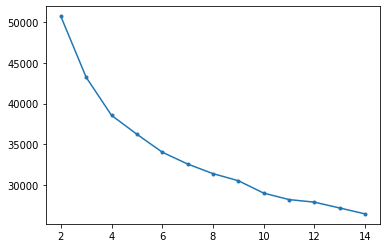

K value for max silhouette: 7


In [0]:
sse_list = []
missclassified_clusters = []
missclassified_cluster_data_index = []
for train, test in skf.split(feat_mush, lab_mush):
  test_labels = []
  max_silhouette = -1
  max_silhouette_index = 0
  for k in range(2, 15):
    mmodel = KMeans(n_clusters=k).fit(feat_mush[train])
    sse_list.append(mmodel.inertia_)
    s_score = silhouette_score(feat_mush[train], mmodel.labels_, metric='euclidean')
    if s_score > max_silhouette:
      max_silhouette = s_score
      max_silhouette_index = k
  plt.plot(list(range(2, 15)), sse_list, '.-')
  plt.show()
  print('K value for max silhouette:', max_silhouette_index)
  final_model = KMeans(n_clusters = max_silhouette_index).fit(feat_mush[train])
  #Go through all clusters
  for i in range(max_silhouette_index):
    missclassified = 0
    cluster_data = []
    iteration = 0
    #Loop through all clustered data and actual labels
    for actual, predicted in zip(lab_mush[train], final_model.labels_):
      #Only look at points from certain cluster
      if predicted == i:
        cluster_data.append(iteration)
        #see if point in cluster have been missclassified
        if actual != predicted:
          missclassified = 1
      iteration +=1
    #Take note of which clusters have missclassified points
    if missclassified == 1:
      missclassified_clusters.append(i)
      missclassified_cluster_data_index.append(cluster_data)
  #Go through the clusters with missclassified data and train a random forest classifier for each
  for i in missclassified_clusters:
    f = feat_mush[train]
    f1 = f[missclassified_cluster_data_index[i]]
    l  = lab_mush[train]
    l1 = l[missclassified_cluster_data_index[i]]
    rf_classifiers.append(random_forest_clf.fit(f1, l1))

  for x in feat_mush[test]:
    prediction = final_model.predict(np.array([x]))
    if prediction in missclassified_clusters:
      test_labels.append(rf_classifiers[prediction[0]].predict(np.array([x])))
    else:
      test_labels.append(prediction)
  
  break

In [0]:
len(final_model.cluster_centers_)

In [0]:
for i in final_model.labels_:
  #print(i)
  